# COEFFICIENT PATH OF RIDGE REGRESSION

**Add the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import neccessary modules and packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from m_learn.linear_model import ridge_regression
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split

## 1. Load & Preprocess Data

**Output and features**

In [3]:
# output of the model
output = 'SalePrice'
# features of the model 
features = ['GarageCars',
            'BsmtFinSF1',
            'TotRmsAbvGrd',
            'LotArea',
            'GrLivArea',
            'KitchenAbvGr',
            'BedroomAbvGr']

**Load the data**

In [4]:
# retrieve the numeric data from the csv file
data = pd.read_csv('./../../data/house_prices/train.csv')._get_numeric_data()

**Fill missing values with column means**

In [5]:
data = data.fillna(data.mean())

**Do a customary train test split**

In [6]:
# train test split
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)
# extract the feature matrix and output vector from the training data
X_train, y_train = get_xy_data(train_data, features, output)
# extract the feature matrix and output vector from the test data
X_test, y_test = get_xy_data(test_data, features, output)

## 2. Investigate coefficient path of ridge regression

**Parameters of ridge models**

In [7]:
# max iterations 
maximum_iterations = 100000
# step size
step_size = 1e-13

### 2.1 Train models and collect model coefficients using different values of lambda

In [8]:
# create a logspace of l2 penalties
l2_penalties = np.logspace(7,12.5, num=20)
# a list to store the weights of ridge regression models trained using different l2 penalties
weights = []

# iterate through each penalty
for penalty in l2_penalties:
    # create a ridge regression model
    model = ridge_regression(penalty)
    # fit the model using training data
    model.fit(X_train, y_train, step_size = step_size, maximum_iterations = maximum_iterations)
    # append the coefficients of the model to the designated list (excepting intercept)
    weights.append(model.coefficients[1:])

# convert the list of numpy vectors to numpy array    
weights = np.array(weights)
# store the numpy array in pandas dataframe
weights = pd.DataFrame(data = weights, columns = features, index=l2_penalties)
weights.index.name = 'l2_penalty'

**Inspect the model coefficients at different values of l2 penalty or lambda**

In [9]:
weights.head(20)

,GarageCars,BsmtFinSF1,TotRmsAbvGrd,LotArea,GrLivArea,KitchenAbvGr,BedroomAbvGr
l2_penalty,,,,,,,
1.000000e+07,0.420678,50.857927,0.343882,0.455595,100.859439,-0.004103,-0.032560
1.947483e+07,0.393959,49.780408,0.348091,0.512693,100.452698,0.001369,-0.015424
3.792690e+07,0.350171,47.868738,0.354336,0.621295,99.635226,0.010193,0.012271
7.386200e+07,0.288130,44.720886,0.361022,0.823775,97.978585,0.022225,0.050233
1.438450e+08,0.218603,40.096266,0.362177,1.188524,94.660680,0.034356,0.089048
2.801357e+08,0.160312,34.195043,0.347979,1.809189,88.383714,0.041380,0.112735
5.455595e+08,0.118692,27.559026,0.311444,2.772238,77.821213,0.041079,0.114354
1.062468e+09,0.086379,20.746599,0.253692,4.068932,62.854453,0.035080,0.098701
2.069138e+09,0.059198,14.380040,0.185182,5.507492,45.676950,0.026195,0.074116


### 2.2 Plot of coefficient path of ridge regression

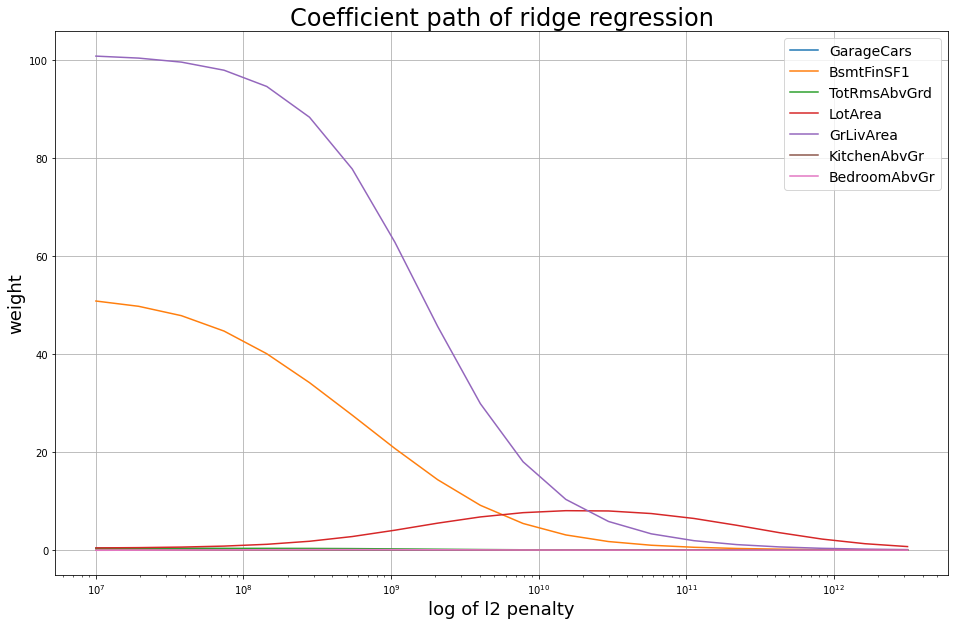

In [10]:
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)
# iterate through each feature
for feature in features:
    # plot feature weight vs penaties (log)
    plt.plot(l2_penalties, weights[feature])
    
plt.xscale('log')
plt.xlabel('log of l2 penalty', fontsize=18)
plt.ylabel('weight', fontsize=18)
plt.legend(features, fontsize=14)
plt.title("Coefficient path of ridge regression", fontsize= 24)
plt.grid()
plt.show()